# Proyecto: Métodos de Interpolación
### Análisis y Predicción de Datos Meteorológicos

Interpolacion (BREVE EXPLICACION)

Los datos sumisnistrados son de la ciudad __Basilea__, en Suiza de 2023; y fueron proporcionados por la pagina __meteoblue__: https://www.meteoblue.com/es/tiempo/archive/export se debe tener en cuenta que los datos se encuentran en un archivo __CSV__, por lo se debe instalar los paquetes necesarios para poder abrir el documento apropiadamente en JULIA.

In [ ]:
#INSTALACION DE PAQUETES
#Instalacion de paquete para usar archivo CSV
#using Pkg
#Pkg.add("CSV")
#Pkg.add("DataFrames")

#Intalacion de plot, permite graficar
#using Pkg
#Pkg.add("Plots")


Para acceder al archivo se importa el paquete __CSV__ y __DataFrames__ empleando la palabra '__using__' como se muestra en el codigo.

In [ ]:
#EJEMPLO PARA ABRIR Y LEER UN ARCHIVO
# Importar paquetes
using CSV
using DataFrames

# Leer el archivo CSV
archivo_csv = "data_Basilea.csv" #nombre del archivo
datos = CSV.read(archivo_csv, DataFrame) #lectura del archivo

# Mostrar las primeras filas del DataFrame
println("Datos Generales:") #datos generales del archivo
println(first(datos, 8)) #0-8 filas


In [ ]:
#EJEMPLO A SEGUIR PARA GRAFICAS
# Importar el paquete Plots
using Plots

# Lista de datos (temperaturas)
temperaturas = [20, 21, 19, 22, 23, 20, 21]

# Crear un vector de días (suponiendo que cada valor en la lista corresponde a un día)
dias = 1:length(temperaturas)

# Graficar los datos
plot(dias, temperaturas, label="Temperatura", xlabel="Días", ylabel="Temperatura (°C)", title="Temperaturas Diarias")

### Interpolación de Taylor

Informacion general en base a la teroria
* Se estable un rango de puntos conocidos, que permiten aproximar valores.
* Se construye un polinomio Pn(x) de grado menor o igual que n. (Polinomio de Taylor)

Para mayor informacion revisar el siguiente link: https://rua.ua.es/dspace/bitstream/10045/102428/1/tema2.pdf

__Aplicando teoria en julia__: <br>
Mediante los datos de entrada que serian los dias de una semana, se puede busca predecir un dia especifico, en este caso se tomara la primera semana del 2023 que va el del 1 al 7 de enero, y el dia que se desea predecir es el 10.

__nota__: se podria elegir estos puntos mediante una funcion random que seleccionaria al azar una semana especifica del año, mediante el paquete 'Dates' el cual seria empleado en una funcion que te permita determinar el inicio y fin del año, para luego calcular las semanas del mismo; pero en este caso como se observa se establecieron los puntos previamente para un mejor manejo de información.
<br>

Se observa el grafico de los datos seleccionados:

In [ ]:
using CSV
using DataFrames

datos = CSV.read("data_Basilea.csv", DataFrame) #lectura del archivo
vector = collect(parse.(Float64, datos[10:16, 2])) #se convierte en un vector de tipo float

#grafica de puntos seleccionados
plot(1:length(vector),vector, label="Temperatura", xlabel="Días", ylabel="Temperatura (°C)", title="Temperaturas Diarias de una semana")

Aplicando interpolacion de Taylor:

Dia 8: 9.53C°


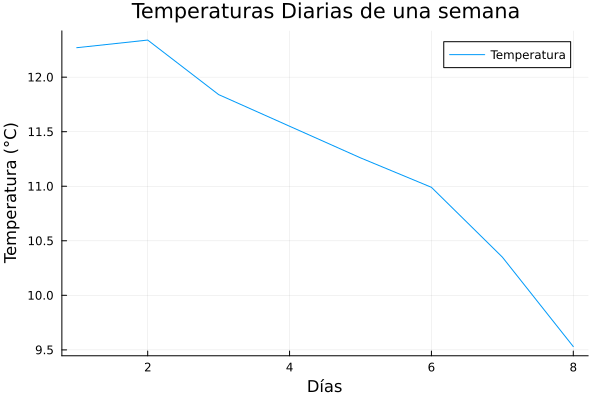

In [14]:
# Importacion de paquetes
using CSV
using DataFrames
using LinearAlgebra 
using Plots

# Leer el archivo CSV
datos = CSV.read("data_Basilea.csv", DataFrame) #lectura del archivo

#puntos seleccionados de una semana
vector = collect(parse.(Float64, datos[10:16, 2])) #se convierte en un vector de tipo float

# Función para calcular la derivada(diferencia finita)
function calculo_derivada(x)
    derivada = diff(x) #calcula derivadas
    return derivada
end

# Calcular la serie de Taylor para sacar interpolacion
function taylor_interpolacion(x, punto_a_predecir)
    # Calcular derivadas
    primera_deriv = calculo_derivada(x)
    segunda_deriv = calculo_derivada(primera_deriv) #segunda derivda
    
    # Último valor conocido (base para la expansión de Taylor)
    ultimo_valor = x[end]

    # Predicción usando serie de Taylor
    prediccion = ultimo_valor
    prediccion += primera_deriv[end]  # Termino de la primera derivada
    prediccion += segunda_deriv[end] / 2  # Termino de la segunda derivada

    return prediccion
end

# Predicción del día 8
valor_prediccion =round(taylor_interpolacion(vector, 8),digits=2) #redondeo a dos decimales
push!(vector, valor_prediccion)#agregando valor al vector
# Output
println("Dia 8: ",valor_prediccion,"C°") #REVISAR SI ES EN CELSIUS
#grafica incluyendo prediccion
plot(1:length(vector),vector, label="Temperatura", xlabel="Días", ylabel="Temperatura (°C)", title="Temperaturas Diarias de una semana con prediccion")


### Interpolación de Lagrange

### Interpolación de Hermite

### Interpolación de Polinomicas a Trozos